In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3D
import matplotlib.animation as animation
import sys
sys.path.insert(0,'../')
import params as par
import json

flight_data = np.load('flight_data.npy', allow_pickle=True).item()
data = flight_data['obs']
distance = flight_data['dist']
u_in = flight_data['input']
step = flight_data['step']
reward = flight_data['reward']

In [7]:
def update_lines(num, data, line):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        return line

In [8]:
ref_trajectory = par.ref_trajectory
index = np.argmax(step)
index_step = step[index]
t = par.time[:index_step]
step

array([164,  77, 129,  15,  46,  62,  58, 159,   2,  30,  61, 108, 137,
        38,  85,  15,  45,  83, 143,  74, 245, 202,  24,   5,  34,   0,
        51,  25,   6, 133,  78, 179])

4.115158931123361

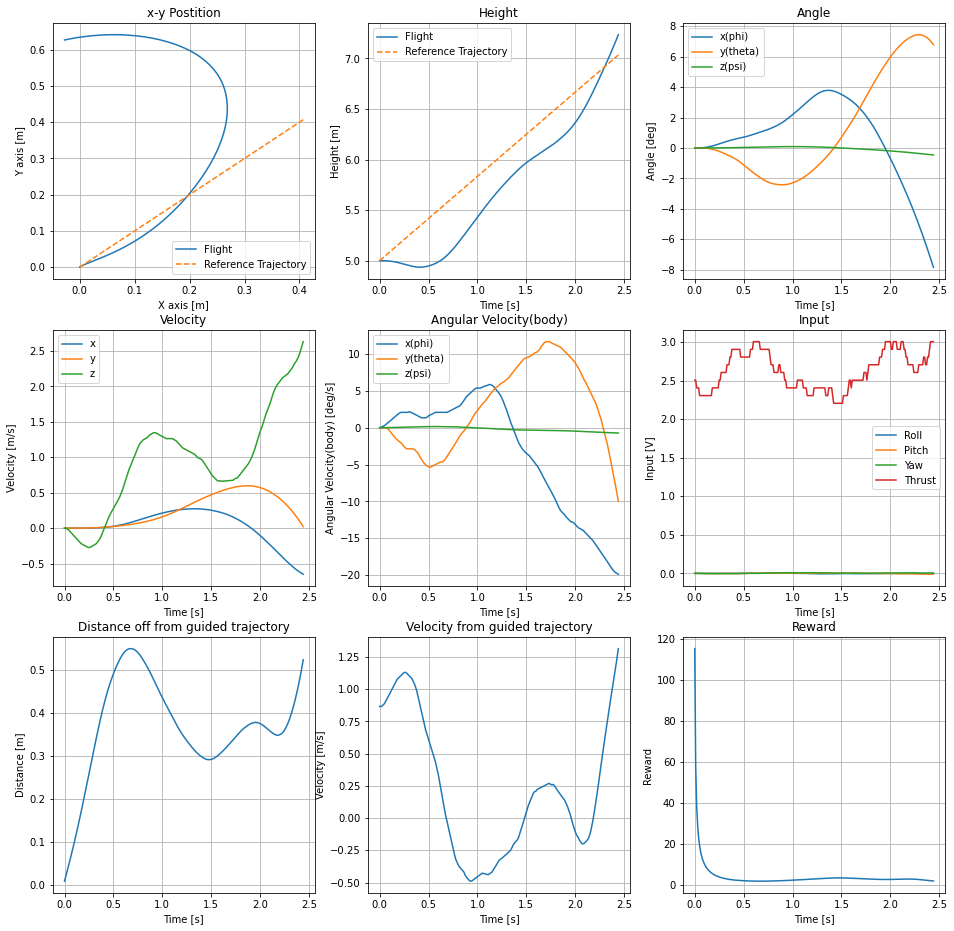

In [9]:
fig2 = plt.figure(num = 2, figsize=(16,16))
ax1 = fig2.add_subplot(3, 3, 1)
plt.plot(data[index,:index_step,9],
            data[index,:index_step,10],
            ref_trajectory[:index_step,0],
            ref_trajectory[:index_step,1],'--')
# plt.xlim(-10,10)
# plt.ylim(-10,10)
plt.title('x-y Postition')
plt.xlabel('X axis [m]')
plt.ylabel('Y axis [m]')
plt.legend(['Flight','Reference Trajectory'])
plt.grid()

ax2 = fig2.add_subplot(3, 3, 2)
plt.plot(t,data[index,:index_step,11],
            t,ref_trajectory[:index_step,2],'--')
plt.title('Height')
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.legend(['Flight','Reference Trajectory'])
plt.grid()

ax3 = fig2.add_subplot(3, 3, 3)
plt.plot(t,data[index,:index_step,6]*180/np.pi,
            t,data[index,:index_step,7]*180/np.pi,
            t,data[index,:index_step,8]*180/np.pi)
plt.title('Angle')
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.legend(['x(phi)','y(theta)','z(psi)'])
plt.grid()

ax4 = fig2.add_subplot(3, 3, 4)
plt.plot(t, data[index,:index_step,3],
            t, data[index,:index_step,4],
            t, data[index,:index_step,5])
plt.title('Velocity')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend(['x','y','z'])
plt.grid()

ax5 = fig2.add_subplot(3, 3, 5)
plt.plot(t, data[index,:index_step,0]*180/np.pi,
            t, data[index,:index_step,1]*180/np.pi,
            t, data[index,:index_step,2]*180/np.pi)
plt.title('Angular Velocity(body)')
plt.xlabel('Time [s]')
plt.ylabel('Angular Velocity(body) [deg/s]')
plt.legend(['x(phi)','y(theta)','z(psi)'])
plt.grid()

ax6 = fig2.add_subplot(3, 3, 6)
plt.plot(t, u_in[index,:index_step,0],
            t, u_in[index,:index_step,1],
            t, u_in[index,:index_step,2],
            t, u_in[index,:index_step,3])
plt.xlabel('Time [s]')
plt.ylabel('Input [V]')
plt.title('Input')
plt.legend(['Roll','Pitch','Yaw','Thrust'])
plt.grid()

ax7 = fig2.add_subplot(3, 3, 7)
plt.plot(t,distance[index,:index_step])
plt.title('Distance off from guided trajectory')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]')
plt.grid()

ax8 = fig2.add_subplot(3, 3, 8)
distance_dot = (distance[index,:index_step] - np.hstack((np.zeros(1), distance[index,:index_step-1])))/par.DELTA_T
plt.plot(t,distance_dot)
plt.title('Velocity from guided trajectory')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.grid()

ax8 = fig2.add_subplot(3, 3, 9)
plt.plot(t, reward[index,:index_step])
plt.xlabel('Time [s]')
plt.ylabel('Reward')
plt.title('Reward')
plt.grid()

fig2.savefig('./flight_data.png')

reward[index,:index_step].mean()

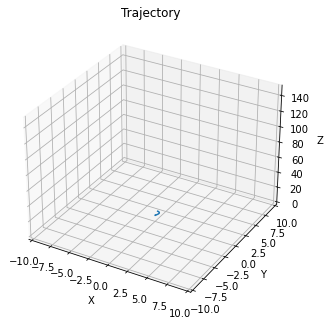

In [10]:
# Attaching 3D axis to the figure
fig1 = plt.figure(num = 1, figsize=(plt.figaspect(1)))
ax = Axes3D(fig1)

x = data[index,:index_step,9]
y = data[index,:index_step,10]
z = data[index,:index_step,11]
data_plot = np.array([x,y,z])

line = ax.plot(x, y, z)[0]

# Setting the axes properties
ax.set_xlim3d([-10, 10])
ax.set_ylim3d([-10, 10])
ax.set_zlim3d([0, 150])

ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_zlabel('Z')

ax.set_title('Trajectory')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig1, update_lines, x.size, fargs=(data_plot, line),
                                interval=50, blit=False)
line_ani.save('./flight.gif', writer='pillow', fps=60)

plt.show()